# 单头注意力RNN:停止用你的头思考

# 摘要
语言建模的主要方法都是痴迷于我年轻时的电视节目——变形金刚和芝麻街。变形金刚这个，变形金刚那个，还有这里的一堆火，相当于gpu - tpu -神经晶圆片规模的硅。我们选择了老办法和经过验证的技术，并使用了一个新奇的、受密码启发的缩写:单头注意力RNN (SHA-RNN)。作者的唯一目标是表明，如果我们沉迷于一个略有不同的缩略词和略有不同的结果，整个领域可能会朝着不同的方向发展。我们采用以前的强大的语言模型，只基于乏味的LSTMs，然后在enwik8上将其转换为最先进的字节级语言模型。这部作品没有经过任何深入的超参数优化，完全生活在一台普通的台式电脑上，这让作者的小单间公寓在旧金山的夏季显得太温暖了。由于作者缺乏耐心，最终的结果可以在正负24小时内完成。注意机制也很容易扩展到大的上下文，只需要很少的计算。就拿芝麻街来说吧。

# 1. 介绍
语言一直是人类的眼中钉，因为我们进化出了一个足够复杂的音频和图形处理单元，可以发出声音，更不用说编写加密货币白皮书或意见专栏了。语言是人类历史上每一次冲突的核心，从世界大战(烹饪和其他)到你和你吵闹的邻居之间的边境冲突。许多人认为语言有可取之处。他们声称(缺乏证据)，语言可能包含有用的知识，远低于我们通常看到的文化基因和五颜六色的侮辱，就像在木星的卫星欧罗巴的冰下可能发现生命一样。许多人通过分裂和征服来对抗语言的同质化，就像他们在《通天塔》中所做的那样(参见:Javascript框架)。不管你对语言的感觉如何，一个赌徒都希望语言至少再存在几年，因此这是一个值得研究的领域。

## 1.1 语言是人类运行时间最长的程序
也许自然语言处理和语言建模最令人惊讶的发现是，我们写的标准文本、我们说的话以及我们交流的方式中蕴含了丰富的知识。不管我们是否打算捕捉，历史、智慧和计算都被记录在最乏味的细节中。认识到语言不仅仅是人类的语言也是很重要的。语言跨越了各种编码形式:符号、视觉或声音。世界上的许多复杂性和过程都可以被重写成一种语言，无论是人工生成的源(通过Van Eck phreaking解码CRT监视器的图像)还是自然生成的，正如您可能期望的这篇文本。自然语言的概念远远超出了我们在过去几个世纪中可能提出的界限。我们从试图预测这些模式中学到的往往是丰富的知识来源，有意或无意。

## 1.2 直接的动机
语言建模是自然语言处理的基础工作之一。该任务涉及在给定前n个令牌的序列中预测(n + 1)个令牌。

在自然的情况下，这是一个尴尬的约会，他们拼命地想把你的句子说完，向你展示他们有多聪明——即使他们猜错了每一个地方。在算法设置中，它会自动建议给你的手机充电，聪明地建议如果你提到躲避，你的侮辱会更伤人。

为什么语言和语言模型是如此丰富的知识来源?神经网络，加上或减去几个数以百万计的参数，理论上能够实现普遍的函数逼近。当你要求一个足够复杂的神经网络来近似语言时，你是在要求它近似文本的所有错综复杂之处，其中大部分你可能甚至都没有意识到。

至少就目前的情况来看，语言模型并不智能——但它们确实在向我们反射智能。那些创建了定义、描述和扩展我们世界的庞大数据集的人正在从事智力工作。传递足够多的文本的语言模型仅仅是将缓存的人工计算的片段进行显示和连接。

假定语言是人类运行时间最长的程序，我们现在注意到人类从未造就出最好的程序员。虽然意大利面条编码是用于无结构和难以维护的代码，我们也有意大利面条语言。由于我们不知道如何组织自己，大量的机会留给了机遇。由于调用堆栈返回地址为空，未被发现和继续的伟大作品。知识被隐藏起来，直到收垃圾的人毫不留情地来之前，再也不会被提及。这就是我希望语言模型能够解决的问题。

在这里，我们通常会讨论什么是令牌。代币是你想要的任何东西。语言模型已经被证明可以处理像素、音频、字符、单词等等。基于文本的语言建模传统上侧重于单词、子单词和字符。

然而，值得注意的一点是，通过定义单词或子单词，我们定义了语言模型的计算和结构的主要部分。从过去几年机器学习的进步中可以观察到:人类在僵化地定义机器学习模型上投入的工作越多，我们就越有可能无意中阻碍了它。





# 2. 动机
## 2.1 交替的历史和研究小说的类型
想象一下，如果我们生活在一个时间轴上，“注意力是你所需要的一切”成为了一首热门流行歌曲的标题，而最初的奥尔斯决定不出版他们的作品。接下来是什么?我们是否期望研究进展会停滞不前，直到最终在一个秘密地下掩体中重建多头注意力?这个掩体是为了保护最后幸存下来的几个有明亮眼睛的研究人员，使他们免受评论者2的无中生有的攻击。这似乎不太可能。进展可能会在一个不同的研究领域，我们将看到周围的研究领域蓬勃发展，就像一座桥梁建立在以前无法通行的河流上。

我在脑海中把这个场景演了出来，与“放弃LSTM，它是过时的技术，就像汽车电话或你的电子鸡或你女朋友的点击轮iPod或…”这是从我的许多研究朋友那里听到的，这篇论文中描述的模型就是结果。

澄清一下，如果这个模型失败了，我很高兴，但为什么要立即排除这种可能性呢?为什么要像飞蛾成群结队地爬上灯泡一样，只朝一个方向前进呢?


## 2.2 反对研究方向
到目前为止，我有一个信念，那就是一个集群一年完成的计算，下一年就会变成一台消费机器。这并不是因为科技在过去几年里有什么神奇的进步，而是因为一旦我们知道某件事是有可能做到的，通常就会有更有效的方法去实现它。

与替代性历史相似，与摩尔定律的长期趋势相关，我们不能确定效率最终会实现。没有确定的最终状态——相反，这是一个由社区设定的隐含目标。

如果围绕难以复制的大型计算模型的训练和研究聚集在一起，那么只有难以复制的大型计算模型才能从我们这个领域持续的研究改进中受益。如果微型计算机在20世纪晚期衰落了，而大型计算机取得了胜利，那么我们很可能在谈论小型独立机器这一不可避免的死胡同。

## 2.3 一个孤独的GPU
虽然看起来很不理智，但我并不想使用云中的某个集群，在我做各种实验时，看着美元从我的银行账户中流出。因此，这里的所有工作都是在一个单独的GPU上完成的。次要的评估和模型的背壳实验是使用辅助GPU完成的，同时在第一个GPU上继续训练。
 
我并不反对使用很多gpu，我觉得我可以有效地使用它们，但是我还没有找到一种经济有效的方法。朋友们主要建议在云服务上使用免费积分——但这似乎是不可持续的。作为一个独立的研究人员，我担心会失去计算能力，担心自己会从陡峭的悬崖上摔下来，担心自己脚下的魔毯会被扯下来，担心自己的马车会变成南瓜，还有其他相关的夜惊。也许我是不理性的，我应该抓住我可以得到的计算，而我可以得到它-但我知道，如果我失去这样的计算，它将影响我的士气和战斗精神。我也不相信我不能做得更好，这意味着我一定会做得更糟，更多。

如果我真的相信“某一年需要集群来计算的东西，下一年就需要一台消费机器”，那么我也应该愿意接受它——至少在某种程度上是这样。无论如何，我所有最好的作品似乎都来自于相对较低的资源和创造力。这恰好也是保持长远和开放心态的正确策略。如果我得到一种可能性的种子，这种种子运行良好，并且随着更多的计算而蓬勃发展，那么计算就会在那里等着我。

可持续计算是我所追求的。不仅对我自己，而且因为我真诚地相信，机器学习应该遵循迷你计算机的历史，它们首先为我们每个人提供了自己的设备。适当的伙伴关系，而不是零星的免费信贷，与实体从完成的工作中获得价值。这些伙伴关系可以是个人或公司——更多的是关于一致的价值观。我们需要一个摩尔定律来指导机器学习，以鼓励微型计算机的未来，而不是大型机的未来。

# 3.模型架构
模型体系结构是Merity等人对AWD-LSTM的升级。代码有点可怕。我承认。我非常了解代码库，cruft不会让我慢下来。就像《千年隼》里的Han一样，它是一堆垃圾，但它是一堆我知道怎么飞的垃圾。

在这篇论文之后，我计划从头开始重建代码库，既作为他人的教育工具，也作为学术界和工业界未来工作的强大平台。

该模型由可训练的嵌入层、一层或多层叠加的单头注意递归神经网络(SHA-RNN)和softmax分类器组成。嵌入和softmax分类器利用系权。

该模型使用了一个单一的注意力头，它更接近于连续缓存或指针标记线，以及一个类似于Transformer的改进的前馈层，我在内部将其称为Boom layer.。我也可以建议它是一个繁荣层给你太多的乐趣，我说它。为什么Boom?我们取一个从小(1024)到大(4096)到小(1024)的向量。这其实并不难想象——当你在嘘嘘的时候，如果需要的话，用你的手。


## 3.1 简化的注意机制
许多受Transformer启发的架构中使用的注意机制在构建中没有顺序性，并且有许多复杂的注意头——每层有几十个。人们可能会对此提出异议，因为简单总比复杂好。

这项工作中的注意机制被简化有两个原因。首先，有人知道我们需要多少注意力吗?第二，为什么我们要在注意力层上投入这么多工作?我们能肯定这群注意力所带来的好处吗?

只有一个注意力头，我的记忆才不会被耗尽。通过将内存写入一次而不进行修改(即每一步不进行大的矩阵乘法)，类似于连续缓存和指针标记模型，我们避免了大量的计算。生活更简单了，玫瑰更香了，财富更好地在社会上分配了，你可以用最少的开销无限地延长你的记忆窗口。

## 3.2 Boom层
Boom层与Transformers和其他结构中的大型前馈层有很强的相关性。不管出于什么疯狂的原因，我决定重新整理一下。该层取v∈H形式的一个向量，并使用与GeLU激活的矩阵乘法生成一个向量u∈N×H。然后我们把u分解成N个向量，并把它们加起来，得到w∈H。与传统的下投影层相比，这减少了计算量并删除了整个参数矩阵。

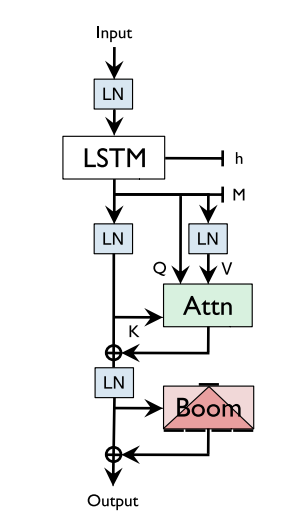
图1所示。SHA-RNN由一个RNN、基于指针的注意和一个“Boom”前馈组成，并附带少量的层归一化。持久状态是RNN的隐藏状态，以及从以前的内存连接起来的内存M。在200◦16至20小时在一个台式烤箱大小的烤箱。

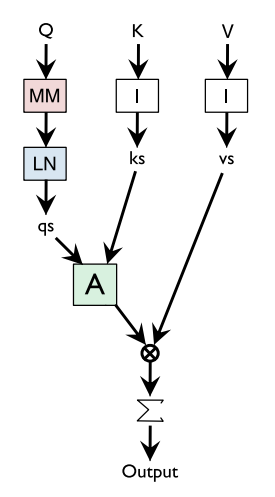
图2。SHA-RNN的注意机制具有很高的计算效率。唯一的矩阵乘法作用于查询。A块表示缩放的点积注意，一个向量-向量运算。操作符{qs, ks, vs}是向量-向量乘法，因此开销最小。我们使用一个sigmoid来生成{qs, ks}。见第6.4节。